# Opdracht model-evaluatie

In [40]:
from sklearn.datasets import load_breast_cancer
import numpy as np

## Opdracht 1

Laad [de borstkanker-dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
) en maak gebruik van `DESCR` om een beeld te krijgen van de gegevens die in deze dataset zijn opgeslagen. zorg ervoor dat je de *features* in een variabele `X` krijgt en de *targets* in de variabele `y` (dit kan op minimaal twee manieren). Je hoeft voor deze opgave geen EDA te maken of de data helemaal op te schonen (mag natuurlijk wel).

Je hoeft het niet allemaal in één cel te doen; voel je vrij om meer cellen aan te maken wanneer je dat wilt.

In [41]:
# YOUR CODE HERE
data = load_breast_cancer()
data.DESCR
X = data.data
y = data.target


Maak een [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) met de standaard-waarden voor alle parameters. Geef dit model mee aan `plot_learning_curve` die in `helpers.py` te vinden is. Behalve dit model verwacht die methode eveneens een titel, de `X` en de `y`. De volledige signature van die methode staat hieronder; bestudeer eventueel [de code](helpers.py) om de volledige implementatie te zien.

```
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
)
```

<module 'matplotlib.pyplot' from 'c:\\users\\juria\\documents\\github\\machine-learning-2023-2024\\env\\lib\\site-packages\\matplotlib\\pyplot.py'>

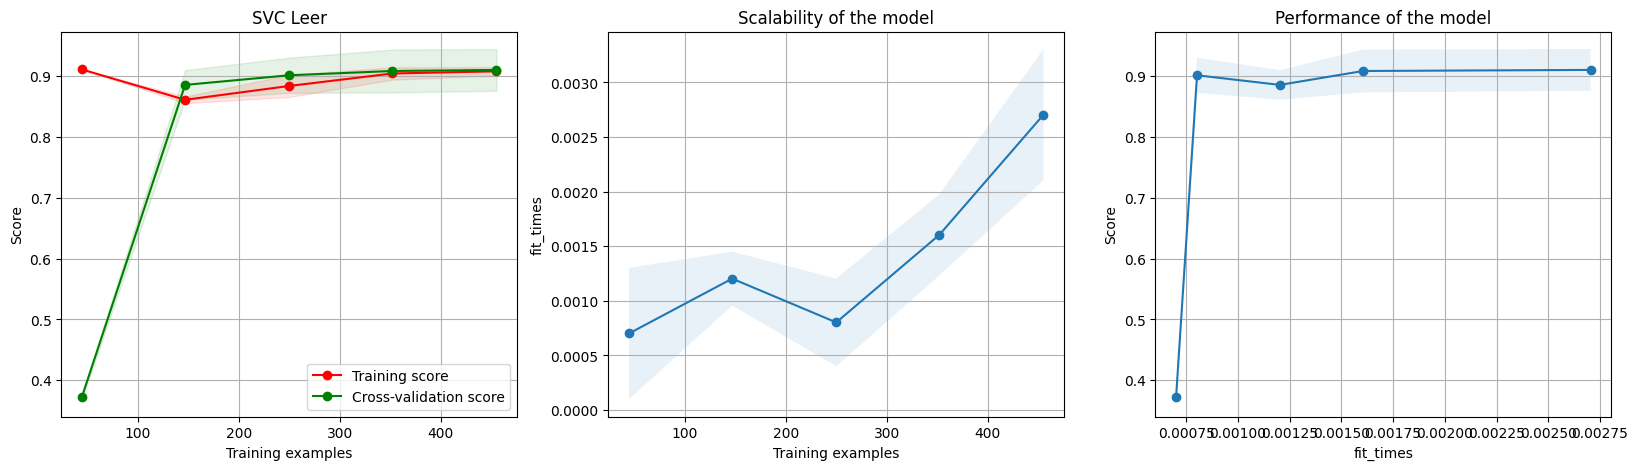

In [42]:
from sklearn.svm import SVC
from helpers import plot_learning_curve
# YOUR CODE HERE
svc = SVC(kernel='poly', degree=5)
# svc = SVC(kernel='rbf')
plot_learning_curve(estimator=svc, title="SVC Leer", X=X, y=y)

#Het lijkt met de kernel poly en degree 5 het beste resultaat te zijn. Zowel de trainings als testnauwkeurigheid zijn vlak bij elkaar waardoor er geen
#Overfitting ontstaat. De performance van het model heeft ook een hoge score die ook blijft toenemen. En in vergelijking met de andere kernels neemt
#de schaalbaarheid ook minder snel toe.


Als het goed is, heb je nu hierboven drie grafieken staan. Bedenk op basis van deze visualisatie hoe goed of hoe slecht je vindt dat je *classifier* werkt.

Experimenteer vervolgens met verschillende waarden voor de parameters van die `SVC`: verander de kernel en verhoog (als je kernel `poly` is) de `degree`.  Welke verschillen zie je in de visualisatis? Kun je op basis hiervan een voorstel doen voor de beste waarden voor die parameters?

Maak gebruik van [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) om de data op te splitsen in tachtig procent trainingsdata en twintig procent testdata.

Train een `SVC` op basis van de beste parameters die je hierboven hebt geïdentificeerd. Maak vervolgens een [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) en een [classificatie-raport](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) op basis van de testdata met dit model. Maak tenslotte [een ROC-curve](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics) van dit getrainde model. 

Geef op basis hiervan een analyse van de kwaliteit van het model en een advies over hoe het model eventueel te verbeteren zou zijn.

In [43]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
svc = SVC(kernel='poly', degree=5)
svc.fit(X_train, y_train)


SVC(degree=5, kernel='poly')

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
# YOUR CODE HERE
y_pred = svc.predict(X_test)

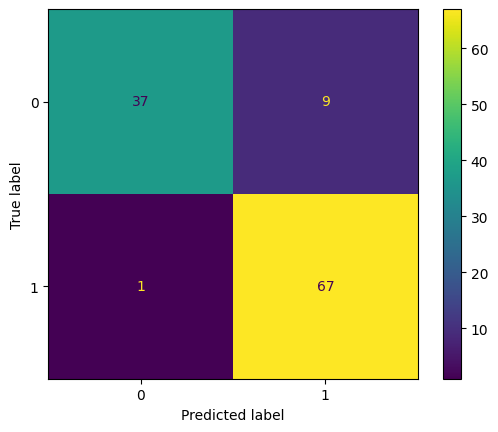

In [45]:
# Plot een confusion-matrix.
# Maak gebruik van de klasse ConfusionMatrixDisplay die hierboven is geïmporteerd
# YOUR CODE HERE
confusion = confusion_matrix(y_test, y_pred)
conf_disp = ConfusionMatrixDisplay(confusion)
conf_disp.plot()

# TP-FN
# FP-TN

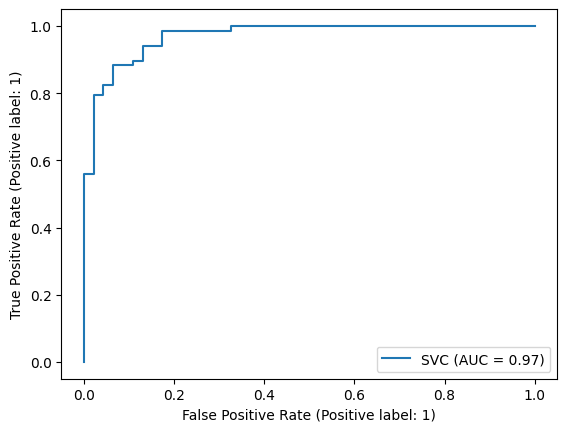

In [46]:
# Plot een ROC-curve.
# Maak gebruik van de klasse RocCurveDisplay die hierboven is geïmporteerd
# YOUR CODE HERE
roc_display = RocCurveDisplay.from_estimator(svc, X_test, y_test)

# De ROC-curve toont de relatie tusasen de TPR en FPR
# Een AUC van 0.95 is niet wat we willen zien. 

## Opdracht 2

Maak en train nu verschillende andere typen *classifiers* (een aantal is hieronder gegeven, maar voel je vrij om een andere set te gebruiken). Let op: alle *classifiers* in sklearn implementeren dezelfde interface: maak hiervan gebruik in je realisatie.

In de cel hieronder wordt een *DataFrame* `result_table` gedefinieerd. Het is de bedoeling dat je van alle *classifiers* die je gebruikt en traint de `fpr`, de `tpr` en de `auc` in dit *DataFrame* opslaat. Je kunt hiervoor gebruik maken van de sklearn-methoden [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) en [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). 

In [47]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# DataFrame om de gevonden metrieken per classifier in op te slaan.
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# YOUR CODE HERE
result = []

lijst = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for c_name, c in list_of_classifiers.items():
    c.fit(X_train, y_train)
    y_scores = c.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    result.append({'classifiers': c_name, 'fpr': fpr, 'tpr': tpr, 'auc': auc_score})

result_table = pd.DataFrame(result)






In de cel hieronder wordt de variabele `result_table` gebruikt om de verschillende ROC's in één figuur te plotten. Je hoeft hiervoor niks te programmeren; als je de cel runt krijgt je als het goed is direct de juiste visualisatie. 

Kun je op basis van deze visualisatie een uitspraak doen over welk model de beste performance heeft voor deze dataset? 

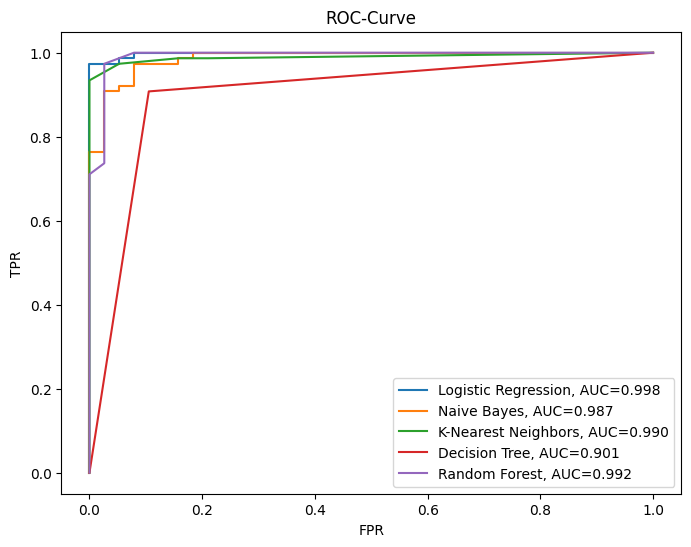

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label=f"{result_table.loc[i]['classifiers']}, AUC={result_table.loc[i]['auc']:.3f}")  

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC-Curve')
plt.legend(loc='lower right')

plt.show()

#Logistic regression heeft hierin de beste accuracy